# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## Cleaning the texts

In [4]:
import re #keep the letters
import nltk#NL procesing tool kit
nltk.download('stopwords')#get the words like a and, that, ....
from nltk.corpus import stopwords #import it
from nltk.stem.porter import PorterStemmer #to transform the diferent time of  a verb in just one infinitive form
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])#delet all the contnent that is not a letter or space
  review = review.lower()#transfor all in lower letters
  review = review.split()#split the phrases in each word
  ps = PorterStemmer()#constructor
  all_stopwords = stopwords.words('english')#select in what lengujes are the stop words
  all_stopwords.remove('not')#remove not becouse its usefull here
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]#keep all the words that are not stopwrods and transform it in a infinive form
  review = ' '.join(review)#re join each word in a phrase
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Creating the Bag of Words model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)#make a histogram of each most frecuently 1500words
X = cv.fit_transform(corpus).toarray() #get the histogram of our data
y = dataset.iloc[:, -1].values #take the output of the data its a binary output

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##Function to get metrics

In [7]:
def calculate_metrics(y_true, y_pred):
    from sklearn.metrics import confusion_matrix #, accuracy_score, precision_score, recall_score, f1_score
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TP, FP, FN, TN = cm.flatten()
    # Calculate accuracy
    accuracy = (TP+TN)/(TP+TN+FP+FN) #accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = TP/(TP+FP) #precision_score(y_true, y_pred)

    # Calculate recall
    recall = TP/(TP+FN)#recall_score(y_true, y_pred)

    # Calculate F1 score
    f1 = 2*precision*recall/(precision+recall) #f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

In [8]:
Results = []

## Naive Bayes model G-NB

In [9]:
from sklearn.naive_bayes import GaussianNB
classifierGNB = GaussianNB()#constructor
classifierGNB.fit(X_train, y_train)#training
y_pred = classifierGNB.predict(X_test)#prediction
Results.append(['G-NB', calculate_metrics(y_test, y_pred)])#saving metrics

## K-NN model


In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#constructor
classifierKNN.fit(X_train, y_train)#training
y_pred = classifierKNN.predict(X_test)#prediction
Results.append(['K-NN', calculate_metrics(y_test, y_pred)])#saving metrics

## Logistic Regression model LR


In [11]:
from sklearn.linear_model import LogisticRegression
classifierLN = LogisticRegression()#constructor
classifierLN.fit(X_train, y_train)#training
y_pred = classifierLN.predict(X_test)#prediction
Results.append(['LR', calculate_metrics(y_test, y_pred)])#saving metrics

## Random Forest Classification model RF


In [12]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')#constructor
classifierRF.fit(X_train, y_train)#training
y_pred = classifierRF.predict(X_test)#prediction
Results.append(['RF', calculate_metrics(y_test, y_pred)])#saving metrics

## Decision Tree Classification model DT


In [13]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy')#constructor
classifierDT.fit(X_train, y_train)#training
y_pred = classifierDT.predict(X_test)#prediction
Results.append(['DT', calculate_metrics(y_test, y_pred)])#saving metrics

##  SVM model

In [14]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf', random_state = 0)#constructor
classifierSVM.fit(X_train, y_train)#training
y_pred = classifierSVM.predict(X_test)#prediction
Results.append(['SVM', calculate_metrics(y_test, y_pred)])#saving metrics

##Other methods



##  CART model

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifierCART = DecisionTreeClassifier(criterion = 'gini')#constructor
classifierCART.fit(X_train, y_train)#training
y_pred = classifierCART.predict(X_test)#prediction
Results.append(['CART', calculate_metrics(y_test, y_pred)])#saving metrics

##  Maximum Entrop model

In [17]:
from sklearn.linear_model import LogisticRegression
classifierME = LogisticRegression(solver='lbfgs', multi_class='multinomial')#constructor
classifierME.fit(X_train, y_train)#training
y_pred = classifierME.predict(X_test)#prediction
Results.append(['ME', calculate_metrics(y_test, y_pred)])#saving metrics

##Compartion of clasification methods

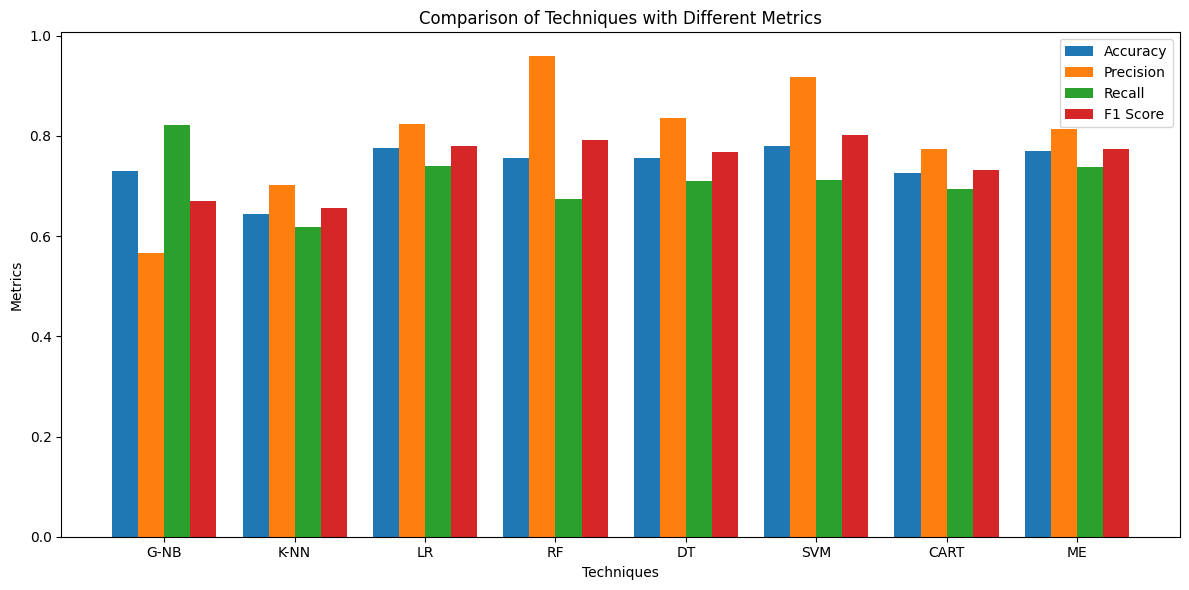

In [24]:
# Extract techniques and metrics
techniques = [result[0] for result in Results]
metrics = [result[1] for result in Results]

# Extract individual metrics for plotting
accuracy = [metric[0] for metric in metrics]
precision = [metric[1] for metric in metrics]
recall = [metric[2] for metric in metrics]
f1_score = [metric[3] for metric in metrics]

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = range(len(techniques))

rects1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
rects2 = ax.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
rects3 = ax.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')
rects4 = ax.bar([i + 3 * bar_width for i in index], f1_score, bar_width, label='F1 Score')

ax.set_xlabel('Techniques')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Techniques with Different Metrics')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(techniques)
ax.legend()

plt.tight_layout()
plt.show()

In [25]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Initialize dictionaries to store the best result for each metric
best_results = {metric: {'technique': None, 'value': 0.0} for metric in metrics}

# Find the best result for each metric
for technique, metric_values in Results:
    for metric_index, metric_value in enumerate(metric_values):
        metric = metrics[metric_index]
        if metric_value > best_results[metric]['value']:
            best_results[metric]['technique'] = technique
            best_results[metric]['value'] = metric_value

# Print the best results for each metric
for metric in metrics:
    best_technique = best_results[metric]['technique']
    best_value = best_results[metric]['value']
    print(f"Best {metric}: {best_technique} - {best_value:.2f}")

Best Accuracy: SVM - 0.78
Best Precision: RF - 0.96
Best Recall: G-NB - 0.82
Best F1 Score: SVM - 0.80
